<a href="https://colab.research.google.com/github/ridwibra/Financial-Data-Analysis/blob/main/Analysing_Financial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd

In [ ]:
df = pd.read_pickle('all_banks')

In [ ]:
# load a remote data
# from pandas_datareader import data, wb
# import datetime

In [ ]:
# start = datatime.datatime(2006,1,1)
# end = datetime.datetime(2016,1,1)

# BAC = data.DataReader('BAC','google', start, end )

In [ ]:
df.columns

MultiIndex([('BAC',   'Open'),
            ('BAC',   'High'),
            ('BAC',    'Low'),
            ('BAC',  'Close'),
            ('BAC', 'Volume'),
            (  'C',   'Open'),
            (  'C',   'High'),
            (  'C',    'Low'),
            (  'C',  'Close'),
            (  'C', 'Volume'),
            ( 'GS',   'Open'),
            ( 'GS',   'High'),
            ( 'GS',    'Low'),
            ( 'GS',  'Close'),
            ( 'GS', 'Volume'),
            ('JPM',   'Open'),
            ('JPM',   'High'),
            ('JPM',    'Low'),
            ('JPM',  'Close'),
            ('JPM', 'Volume'),
            ( 'MS',   'Open'),
            ( 'MS',   'High'),
            ( 'MS',    'Low'),
            ( 'MS',  'Close'),
            ( 'MS', 'Volume'),
            ('WFC',   'Open'),
            ('WFC',   'High'),
            ('WFC',    'Low'),
            ('WFC',  'Close'),
            ('WFC', 'Volume')],
           names=['Bank Ticker', 'Stock Info'])

In [ ]:
BAC = df['BAC']
C = df['C']
GS = df['GS']
JPM = df['JPM']
MS = df['MS']
WFC = df['WFC']

In [ ]:
BAC

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15620000
...,...,...,...,...,...
2015-12-24,17.32,17.38,17.22,17.27,29373415
2015-12-28,17.22,17.23,16.98,17.13,41777497
2015-12-29,17.25,17.35,17.16,17.28,45670376


In [ ]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [ ]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC ], axis=1, keys=tickers)

In [ ]:
bank_stocks.head()

BAC                       ...    WFC                        
Stock Info   Open   High    Low  Close  ...   High    Low  Close    Volume
Date                                    ...                               
2006-01-03  46.92  47.18  46.15  47.08  ...  31.98  31.20  31.90  11016400
2006-01-04  47.00  47.24  46.45  46.58  ...  31.82  31.36  31.53  10871000
2006-01-05  46.58  46.83  46.32  46.64  ...  31.56  31.31  31.50  10158000
2006-01-06  46.80  46.91  46.35  46.57  ...  31.78  31.38  31.68   8403800
2006-01-09  46.72  46.97  46.36  46.60  ...  31.82  31.56  31.68   5619600

[5 rows x 30 columns]

In [ ]:
#set the column name level 
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [ ]:
bank_stocks.head()

Bank Ticker    BAC                       ...    WFC                        
Stock Info    Open   High    Low  Close  ...   High    Low  Close    Volume
Date                                     ...                               
2006-01-03   46.92  47.18  46.15  47.08  ...  31.98  31.20  31.90  11016400
2006-01-04   47.00  47.24  46.45  46.58  ...  31.82  31.36  31.53  10871000
2006-01-05   46.58  46.83  46.32  46.64  ...  31.56  31.31  31.50  10158000
2006-01-06   46.80  46.91  46.35  46.57  ...  31.78  31.38  31.68   8403800
2006-01-09   46.72  46.97  46.36  46.60  ...  31.82  31.56  31.68   5619600

[5 rows x 30 columns]

In [ ]:
#max closing price 
for tick in tickers:
  print(tick,bank_stocks[tick]['Close'].max())

BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


In [ ]:
#alternative
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [ ]:
#create an empty DataFrame
returns = pd.DataFrame()

In [ ]:
#use pandas pct_change() method on the close column to create a column representing the returns of each bank's stock
for tick in tickers:
  returns[tick+ ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [ ]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


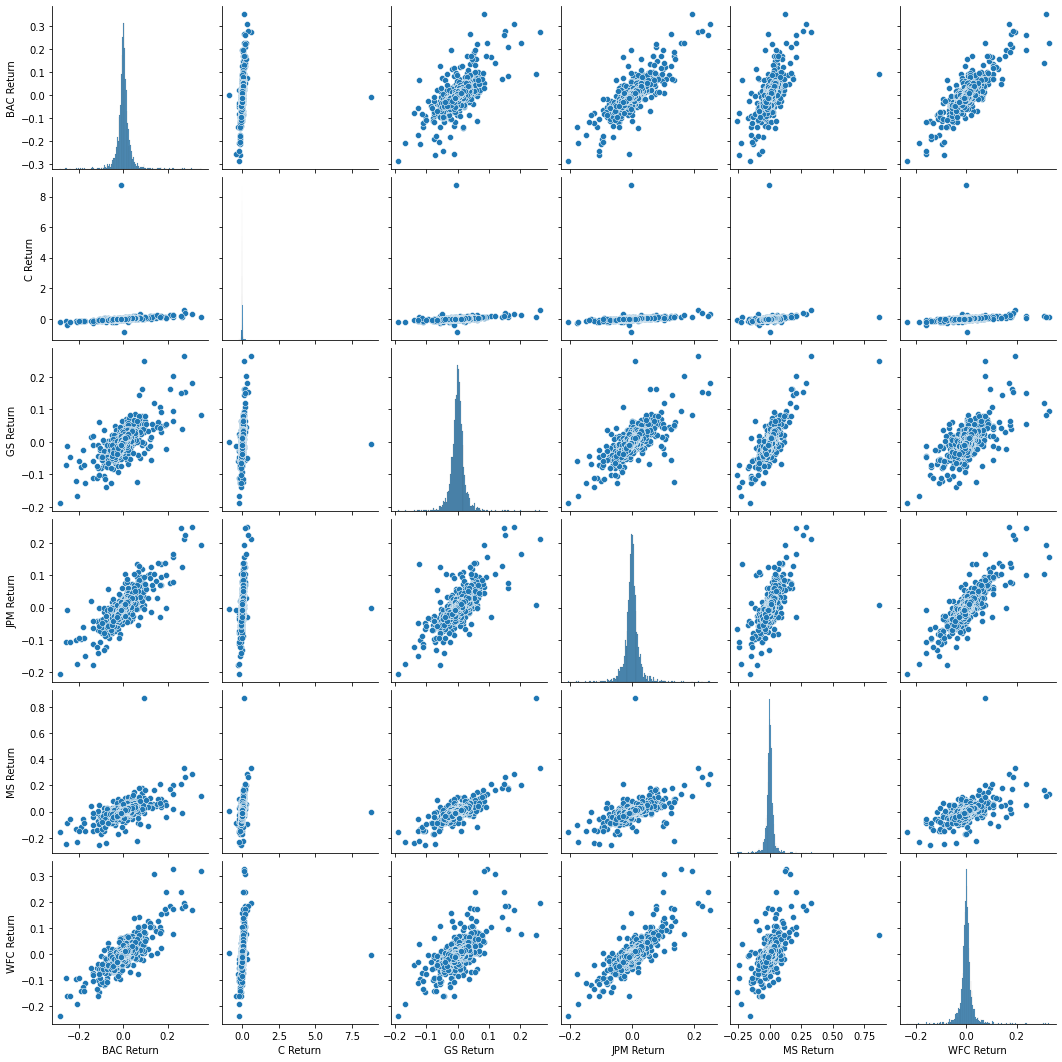

In [ ]:
#create a pairplot of the returns dataframe with seaborn
import seaborn as sns
sns.pairplot(returns[1:])


In [ ]:
#use the returns dataframe to figure out on what dates each bank stock had the best and worst single day returns
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [ ]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [ ]:
#look at the standard deviation of the returns, which stock is the riskiest over the entire period? which is the riskiest for 2015?
#high standard deviation means more risk
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [ ]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

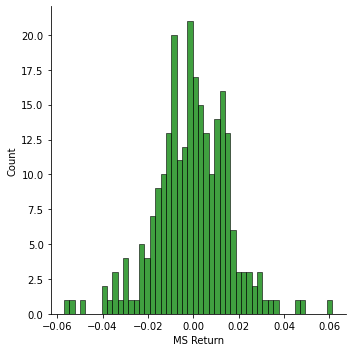

In [ ]:
#create a distplot using seaborn of the 2015 returns for Morgan Stanley

sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=50)

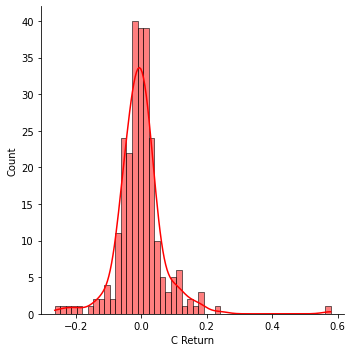

In [ ]:
#create a distplot using seaborn of the 2008 returns for CitiGroup

sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=50, kde=True)

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf 
cf.go_offline()
%matplotlib inline


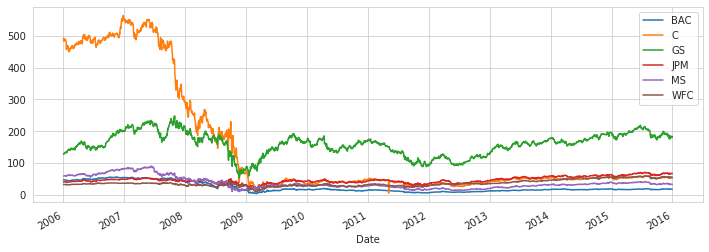

In [ ]:
#create a line plot showing close price for each bank for the entire index of time
for tick in tickers:
  bank_stocks[tick]['Close'].plot(label=tick, figsize=(12,4))
plt.legend()

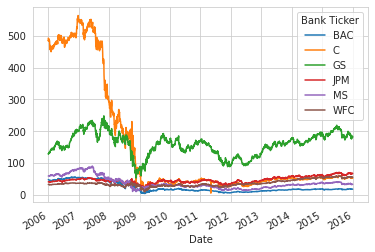

In [ ]:
bank_stocks.xs(key='Close',axis=1, level='Stock Info').plot()

In [ ]:
# to make it interactive
#bank_stocks.xs(key='Close',axis=1, level='Stock Info').iplot()

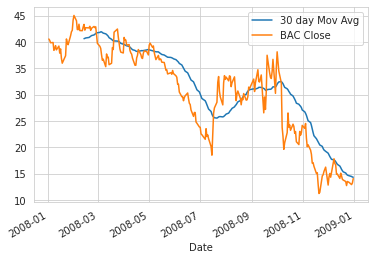

In [ ]:
#plot the rolling 30 day average against the close price for Bank of America's stock for the year 2008
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

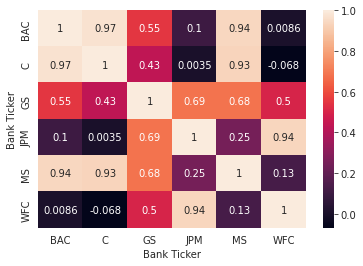

In [ ]:
#create a heatmap of the correlation between the stocks Close Price

sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

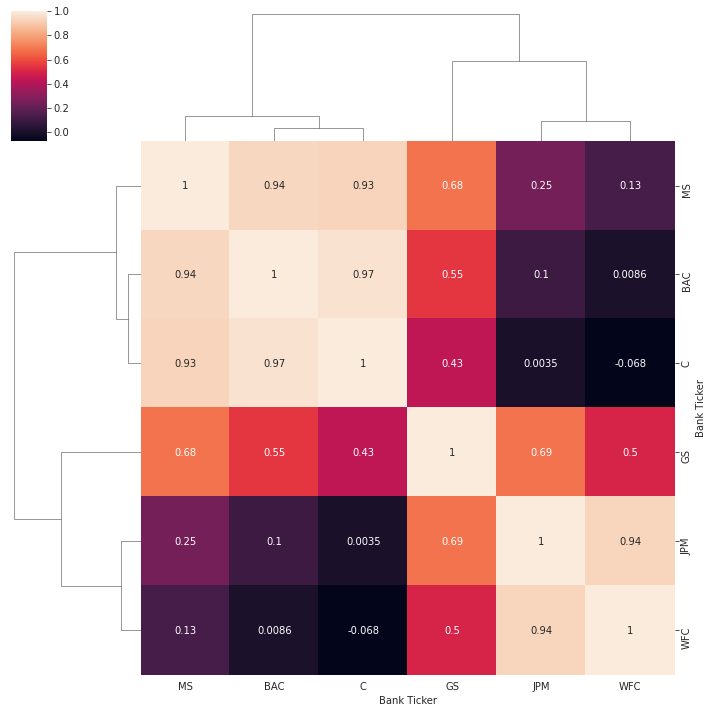

In [ ]:
#alternatively, use clustermap
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

In [ ]:
close_corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()

In [ ]:
#close_corr.iplot(kind='heatmap', colorscale='rdylbu')

In [ ]:
#use .iplot(kind='candle') to create a candle plot of Bank of America's stock from Jan 1st 2015
bac15 = BAC[['Open','High', 'Low','Close']].loc['2015-01-01': '2016-01-01']

In [ ]:
bac15

Stock Info,Open,High,Low,Close
Date,,,,
2015-01-02,17.99,18.03,17.68,17.90
2015-01-05,17.78,17.81,17.29,17.38
2015-01-06,17.42,17.44,16.78,16.86
2015-01-07,17.14,17.18,16.87,16.94
2015-01-08,17.16,17.34,17.10,17.29
...,...,...,...,...
2015-12-24,17.32,17.38,17.22,17.27
2015-12-28,17.22,17.23,16.98,17.13
2015-12-29,17.25,17.35,17.16,17.28


In [ ]:
#bac15.iplot(kind='candle')

In [ ]:
#use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015
#MS['Close'].loc['2015-01-01': '2016-01-01'].ta_plot(study='sma', periods=[13,21,55])

In [ ]:
#use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015
#BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')